<a href="https://colab.research.google.com/github/Rohith-2/VMD-Covid-Lung/blob/main/1D_VMD_128.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Load dataset
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list
#! kaggle datasets download -d anirudhvadakedath/datalung-classified
! kaggle datasets download -d rohithramakrishnan/datalung-classified
! mkdir Dataset
! unzip datalung-classified.zip -d Dataset

In [2]:
#!mkdir -p '/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model'

In [3]:
#!rm -rf '/content/Dataset/Lung/Original'
!rm -rf '/content/datalung-classified.zip'
#!rm -rf '/content/Train_Data'

In [4]:
# import utilities
import os
import glob
import shutil
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import models
from tensorflow.keras import Model
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.callbacks import *
from keras.preprocessing import image

In [ ]:
#extracting two classes, 'Negative for Pneumonia' & 'Typical Appearance' from dataset
data_dir_vmd = '/content/Dataset/Lung/vmd/'
tr_lst = []
for ds in os.listdir(data_dir_vmd):
  if os.path.isdir(os.path.join(data_dir_vmd+ds)):
    tr_lst+=[ds]
print(tr_lst)
print(len(tr_lst))
lst = ['Negative for Pneumonia', 'Typical Appearance']

os.mkdir('/content/Train_Data_vmd/')

for ext in tr_lst:
  if ext in lst:
    os.mkdir('/content/Train_Data_vmd/'+ext)
    extn = data_dir_vmd+ext+'/*.jpg'
    print(extn)
    cl = glob.glob(extn)
    for data in cl:
      shutil.copy(data,('/content/Train_Data_vmd/'+ext))

src1 = '/content/Train_Data_vmd/Negative for Pneumonia'
dst1 = '/content/Train_Data_vmd/Negative'
os.rename(src1, dst1)

src2 = '/content/Train_Data_vmd/Typical Appearance'
dst2 = '/content/Train_Data_vmd/Positive'
os.rename(src2, dst2)

['Typical Appearance', 'Negative for Pneumonia', 'Indeterminate Appearance', 'Atypical Appearance']
4
/content/Dataset/Lung/vmd/Typical Appearance/*.jpg
/content/Dataset/Lung/vmd/Negative for Pneumonia/*.jpg


In [ ]:
data_dir_original = '/content/Dataset/Lung/Original/'
tr_lst = []
for ds in os.listdir(data_dir_original):
  if os.path.isdir(os.path.join(data_dir_original+ds)):
    tr_lst+=[ds]
print(tr_lst)
print(len(tr_lst))
lst = ['Negative for Pneumonia', 'Typical Appearance']

os.mkdir('/content/Train_Data_original/')

for ext in tr_lst:
  if ext in lst:
    os.mkdir('/content/Train_Data_original/'+ext)
    extn = data_dir_original+ext+'/*.jpg'
    print(extn)
    cl = glob.glob(extn)
    for data in cl:
      shutil.copy(data,('/content/Train_Data_original/'+ext))

src1 = '/content/Train_Data_original/Negative for Pneumonia'
dst1 = '/content/Train_Data_original/Negative'
os.rename(src1, dst1)

src2 = '/content/Train_Data_original/Typical Appearance'
dst2 = '/content/Train_Data_original/Positive'
os.rename(src2, dst2)

['Typical Appearance', 'Negative for Pneumonia', 'Indeterminate Appearance', 'Atypical Appearance']
4
/content/Dataset/Lung/Original/Typical Appearance/*.jpg
/content/Dataset/Lung/Original/Negative for Pneumonia/*.jpg


In [ ]:
!rm -rf '/content/Dataset'

In [11]:
data_dir_vmd='/content/Train_Data_vmd'
data_dir_original='/content/Train_Data_original'
batch_size=32
img_height,img_width=512,512

!rm -rf "/content/Dataset/Lung/vmd/Atypical Appearance"
!rm -rf "/content/Dataset/Lung/vmd/Indeterminate Appearance"
!rm -rf "/content/Dataset/Lung/Original/Atypical Appearance"
!rm -rf "/content/Dataset/Lung/Original/Indeterminate Appearance"

In [12]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,validation_split=0.2)
seed = 50
Train_Data_vmd = train_datagen.flow_from_directory(
        "/content/Dataset/Lung/vmd/",
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        seed = seed)

Test_Data_vmd = train_datagen.flow_from_directory(
        "/content/Dataset/Lung/vmd/",
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical',
        subset='validation',
        seed = seed)

Train_Data_original = train_datagen.flow_from_directory(
        "/content/Dataset/Lung/Original/",
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical',
        subset='training',
        seed = seed)

Test_Data_original = train_datagen.flow_from_directory(
        "/content/Dataset/Lung/vmd/",
        target_size=(img_height, img_width),
        batch_size=batch_size,
        shuffle=False,
        class_mode='categorical',
        subset='validation',
        seed = seed)

Found 3617 images belonging to 2 classes.
Found 903 images belonging to 2 classes.
Found 3617 images belonging to 2 classes.
Found 903 images belonging to 2 classes.


In [13]:
num_classes = 2
eph = 50

import tensorflow 
from tensorflow.keras.applications import VGG16
vgg16= tf.keras.applications.VGG16(
    include_top=False,
    weights="imagenet",
    input_shape=(img_height,img_width,3)
)

# Freeze all the layers
for layer in vgg16.layers[:]:
    layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg16.layers:
    print(layer.name, layer.trainable)

input_2 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 False
block5_conv2 False
block5_conv3 False
block5_pool False


In [14]:
# Create the model
model = models.Sequential()
model.add(vgg16)
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))
model.build((img_height,img_width,3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 258       
Total params: 31,492,290
Trainable params: 16,777,602
Non-trainable params: 14,714,688
_________________________________________________________________


In [15]:
from keras import optimizers
optRMSProp=tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.0001, epsilon=1e-07, name="RMSprop",)
model.compile(optimizer=optRMSProp, loss="categorical_crossentropy",metrics=['accuracy'])

from tensorflow.keras import callbacks 
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    min_delta=0.001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=3,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [16]:
VGG_16_vmd =model.fit(Train_Data_vmd,epochs=eph,callbacks=callbacks)

# Save the entire model as a SavedModel.
#!mkdir -p saved_model
#model.save('/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model/vmd_model_32')

Epoch 1/50
114/114 [==============================] - 78s 674ms/step - loss: 0.7534 - accuracy: 0.6464
Epoch 2/50
114/114 [==============================] - 76s 666ms/step - loss: 0.5916 - accuracy: 0.7069
Epoch 3/50
114/114 [==============================] - 77s 669ms/step - loss: 0.5479 - accuracy: 0.7371
Epoch 4/50
114/114 [==============================] - 77s 669ms/step - loss: 0.5205 - accuracy: 0.7473
Epoch 5/50
114/114 [==============================] - 77s 669ms/step - loss: 0.5112 - accuracy: 0.7639
Epoch 6/50
114/114 [==============================] - 77s 669ms/step - loss: 0.4958 - accuracy: 0.7697
Epoch 7/50
114/114 [==============================] - 77s 669ms/step - loss: 0.4632 - accuracy: 0.7871
Epoch 8/50
114/114 [==============================] - 77s 670ms/step - loss: 0.4498 - accuracy: 0.7860
Epoch 9/50
114/114 [==============================] - 77s 669ms/step - loss: 0.4455 - accuracy: 0.7960
Epoch 10/50
114/114 [==============================] - 77s 670ms/step - l

In [17]:
predict_vmd = model.evaluate_generator(Test_Data_vmd, steps=None)
predict_vmd

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[0.6216489672660828, 0.7829457521438599]

In [18]:
model1 = models.Sequential()
model1.add(vgg16)
model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu'))
#model.add(layers.Dense(16, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(num_classes, activation='softmax'))
model1.build((img_height,img_width,3))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 16, 16, 512)       14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 131072)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16777344  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 31,492,290
Trainable params: 16,777,602
Non-trainable params: 14,714,688
_________________________________________________________________


In [19]:
from keras import optimizers
optRMSProp=tf.keras.optimizers.RMSprop(learning_rate=0.0001, momentum=0.0001, epsilon=1e-07, name="RMSprop",)
model1.compile(optimizer=optRMSProp, loss="categorical_crossentropy",metrics=['accuracy'])

from tensorflow.keras import callbacks 
reduce_learning = callbacks.ReduceLROnPlateau(
    monitor='loss',
    factor=0.2,
    patience=2,
    verbose=1,
    mode='auto',
    min_delta=0.001,
    cooldown=2,
    min_lr=0)

eary_stopping = callbacks.EarlyStopping(
    monitor='loss',
    min_delta=0,
    patience=3,
    verbose=1,
    mode='auto')

callbacks = [reduce_learning, eary_stopping]

In [20]:
#model1.compile(optimizer=optRMSProp, loss="categorical_crossentropy",metrics=['accuracy'])
VGG_16_original =model1.fit(Train_Data_original,epochs=eph,callbacks=callbacks)

# Save the entire model as a SavedModel.
#!mkdir -p saved_model
#model1.save('/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model/ori_model_32')

Epoch 1/50
114/114 [==============================] - 76s 658ms/step - loss: 0.6939 - accuracy: 0.6749
Epoch 2/50
114/114 [==============================] - 76s 662ms/step - loss: 0.5426 - accuracy: 0.7321
Epoch 3/50
114/114 [==============================] - 75s 659ms/step - loss: 0.5038 - accuracy: 0.7534
Epoch 4/50
114/114 [==============================] - 75s 659ms/step - loss: 0.4827 - accuracy: 0.7570
Epoch 5/50
114/114 [==============================] - 76s 660ms/step - loss: 0.4710 - accuracy: 0.7866
Epoch 6/50
114/114 [==============================] - 75s 659ms/step - loss: 0.4566 - accuracy: 0.7891
Epoch 7/50
114/114 [==============================] - 75s 660ms/step - loss: 0.4451 - accuracy: 0.7968
Epoch 8/50
114/114 [==============================] - 75s 660ms/step - loss: 0.4326 - accuracy: 0.8026
Epoch 9/50
114/114 [==============================] - 75s 658ms/step - loss: 0.4168 - accuracy: 0.8142
Epoch 10/50
114/114 [==============================] - 75s 660ms/step - l

In [21]:
predict_original = model1.evaluate_generator(Test_Data_original, steps=None)
predict_original

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1973: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


[1.989608883857727, 0.634551465511322]

In [22]:
print('Accuracy: ' ,VGG_16_vmd.history['accuracy'])
print('Loss: ' ,VGG_16_vmd.history['loss'])

Accuracy:  [0.6463920474052429, 0.7069394588470459, 0.7370749115943909, 0.747304379940033, 0.7638927102088928, 0.7696986198425293, 0.7871164083480835, 0.7860105037689209, 0.7959635257720947, 0.804810643196106, 0.8213989734649658, 0.8183577656745911, 0.8296931385993958, 0.8374343514442444, 0.8368813991546631, 0.8490461707115173, 0.8523638248443604, 0.8581697344779968, 0.8581697344779968, 0.8556814789772034, 0.8623168468475342, 0.8653580546379089, 0.8695051074028015, 0.8672933578491211, 0.8830522298812866, 0.8888581991195679, 0.8847110867500305, 0.8918993473052979, 0.8954935073852539, 0.8968758583068848, 0.9129112362861633, 0.9225877523422241, 0.9247995615005493, 0.927564263343811, 0.9297760725021362, 0.9364113807678223, 0.9347525835037231, 0.9380702376365662, 0.9375172853469849, 0.9377937316894531, 0.9372407793998718, 0.9397290349006653, 0.9402819871902466, 0.9435996413230896, 0.9416643381118774, 0.9444290995597839, 0.9430467486381531, 0.9424937963485718, 0.9494056105613708, 0.941664338

In [23]:
print('Accuracy: ' ,VGG_16_original.history['accuracy'])
print('Loss: ' ,VGG_16_original.history['loss'])

Accuracy:  [0.6748687028884888, 0.732098400592804, 0.7533867955207825, 0.7569808959960938, 0.7865634560585022, 0.7890517115592957, 0.7967929244041443, 0.8025988340377808, 0.8142106533050537, 0.8125518560409546, 0.8189107179641724, 0.8321813941001892, 0.8249930739402771, 0.8363284468650818, 0.83660489320755, 0.8390931487083435, 0.8473873138427734, 0.8432402610778809, 0.848493218421936, 0.8584462404251099, 0.853469729423523, 0.8612109422683716, 0.8631462454795837, 0.8670168519020081, 0.8708874583244324, 0.875587522983551, 0.8728227615356445, 0.8744816184043884, 0.8844346404075623, 0.8783522248268127, 0.871993362903595, 0.8844346404075623, 0.8979817628860474, 0.8841581344604492, 0.8913463950157166, 0.8968758583068848, 0.8883052468299866, 0.8874757885932922, 0.9167818427085876, 0.9195466041564941, 0.9203760027885437, 0.9200995564460754, 0.9236936569213867, 0.9239701628684998, 0.9283937215805054, 0.9198230504989624, 0.927564263343811, 0.9300525188446045, 0.9314348697662354, 0.93143486976623

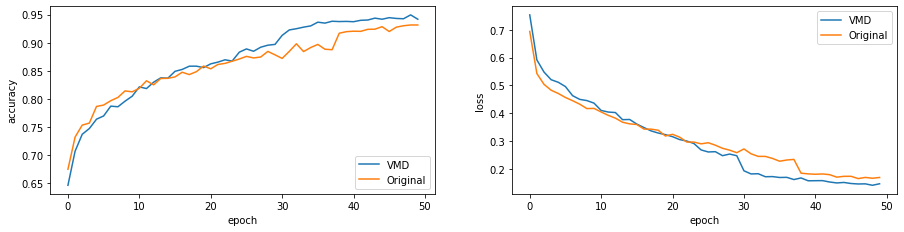

In [26]:
plt.figure(figsize=(40,20))

plt.subplot(5,5,1)
plt.plot(VGG_16_vmd.history['accuracy'])
plt.plot(VGG_16_original.history['accuracy'])
#plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['VMD','Original'], loc='lower right')


# summarize history for loss
plt.subplot(5,5,2)
plt.plot(VGG_16_vmd.history['loss'])
plt.plot(VGG_16_original.history['loss'])
#plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['VMD','Original'], loc='upper right')
plt.show()

VMD
[[1.9362162e-01 8.0637836e-01]
 [9.8714519e-01 1.2854788e-02]
 [9.7757876e-01 2.2421237e-02]
 ...
 [7.2914019e-04 9.9927086e-01]
 [1.7174432e-02 9.8282558e-01]
 [5.1590115e-01 4.8409888e-01]]
                        precision    recall  f1-score   support

Negative for Pneumonia       0.73      0.64      0.68       331
    Typical Appearance       0.81      0.87      0.83       572

              accuracy                           0.78       903
             macro avg       0.77      0.75      0.76       903
          weighted avg       0.78      0.78      0.78       903



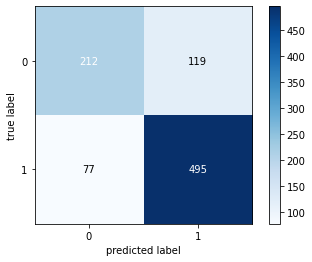

In [24]:
8print('VMD')
predict1 = model.predict(Test_Data_vmd, steps=None)
print(predict1)

in1=[]
for i in np.arange(predict1.shape[0]):
  A= np.max(predict1[i])
  index_1= np.where(predict1[i]==A)
  in1.append(index_1[0][0])
in1=np.array(in1)

from sklearn import metrics
true_classes = Test_Data_vmd.classes
class_labels = list(Test_Data_vmd.class_indices.keys()) 
predicted_classes = (in1)
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(true_classes,predicted_classes)
#print(cm2)
#Visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm1, colorbar=True)
plt.show()

Original
[[0.51373684 0.48626316]
 [0.51093775 0.48906225]
 [0.01720034 0.98279965]
 ...
 [0.03836665 0.9616334 ]
 [0.00688334 0.9931166 ]
 [0.58555955 0.41444048]]
                        precision    recall  f1-score   support

Negative for Pneumonia       0.50      0.16      0.24       331
    Typical Appearance       0.65      0.91      0.76       572

              accuracy                           0.63       903
             macro avg       0.58      0.53      0.50       903
          weighted avg       0.60      0.63      0.57       903



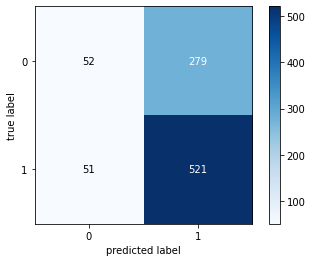

In [25]:
print('Original')
predict1 = model1.predict(Test_Data_original, steps=None)
print(predict1)

in1=[]
for i in np.arange(predict1.shape[0]):
  A= np.max(predict1[i])
  index_1= np.where(predict1[i]==A)
  in1.append(index_1[0][0])
in1=np.array(in1)

from sklearn import metrics
true_classes = Test_Data_original.classes
class_labels = list(Test_Data_original.class_indices.keys()) 
predicted_classes = (in1)
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)
print(report)

from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
cm1 = confusion_matrix(true_classes,predicted_classes)
#print(cm2)
#Visualizing confusion matrix
fig, ax = plot_confusion_matrix(conf_mat=cm1, colorbar=True)
plt.show()

In [ ]:
#new_model = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model/ori_model/')

In [ ]:
'''from sklearn.metrics import classification_report, confusion_matrix
#Confution Matrix and Classification Report
Y_pred = new_model.predict_generator(Test_Data_original)
y_pred = np.argmax(Y_pred, axis=1)
print(y_pred)
print('Confusion Matrix')
print(confusion_matrix(Test_Data_original.classes, y_pred))
print('Classification Report')
target_names = ['Positive','Negative']
print(classification_report(Test_Data_original.classes, y_pred, target_names=target_names))'''

"from sklearn.metrics import classification_report, confusion_matrix\n#Confution Matrix and Classification Report\nY_pred = new_model.predict_generator(Test_Data_original)\ny_pred = np.argmax(Y_pred, axis=1)\nprint(y_pred)\nprint('Confusion Matrix')\nprint(confusion_matrix(Test_Data_original.classes, y_pred))\nprint('Classification Report')\ntarget_names = ['Positive','Negative']\nprint(classification_report(Test_Data_original.classes, y_pred, target_names=target_names))"

In [ ]:
#print(Test_Data_original.classes)

In [ ]:
'''import cv2
img = cv2.imread('/content/Train_Data_original/Negative/000c3a3f293f.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img,(512,512)) #resize image to 128 x 128
img = np.array(img)
img = img.astype('float32')
img /= 255 #normalization
ar = np.array(img)'''

"import cv2\nimg = cv2.imread('/content/Train_Data_original/Negative/000c3a3f293f.jpg')\nimg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\nimg = cv2.resize(img,(512,512)) #resize image to 128 x 128\nimg = np.array(img)\nimg = img.astype('float32')\nimg /= 255 #normalization\nar = np.array(img)"

In [ ]:
#ar.shape

In [ ]:
#new_model.predict(ar)

In [ ]:
'''images = image.load_img("/content/Train_Data_original/Negative/000c3a3f293f.jpg", target_size=(512, 512))    
x = image.img_to_array(images)
#x = tf.image.rgb_to_grayscale(x)
x = np.expand_dims(x, axis=0)
x = x/255.0

#model = tf.keras.models.load_model('num_reader.model')
new_model.predict(x).argmax()'''

'images = image.load_img("/content/Train_Data_original/Negative/000c3a3f293f.jpg", target_size=(512, 512))    \nx = image.img_to_array(images)\n#x = tf.image.rgb_to_grayscale(x)\nx = np.expand_dims(x, axis=0)\nx = x/255.0\n\n#model = tf.keras.models.load_model(\'num_reader.model\')\nnew_model.predict(x).argmax()'

In [ ]:
'''new_model_ori = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model/ori_model/')
new_model_vmd = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model/vmd_model/')'''

"new_model_ori = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model/ori_model/')\nnew_model_vmd = tf.keras.models.load_model('/content/drive/MyDrive/Colab Notebooks/DL/vmd_saved_model/vmd_model/')"

In [ ]:
'''path_vmd = '/content/Train_Data_vmd'
path_ori = '/content/Train_Data_original''''

SyntaxError: ignored

In [ ]:
'''# read image
img_lst = []
l = 0
for fol in os.listdir(path_ori):
  for img_file in os.listdir(os.path.join(path_ori,fol)):
    img_path = os.path.join(path_ori,fol,img_file)
    images = image.load_img(img_path, target_size=(512, 512))    
    x = image.img_to_array(images)
    x = np.expand_dims(x, axis=0)
    x = x/255.0
    if new_model_ori.predict(x).argmax() != l:
      img_path = os.path.join(path_vmd,fol,img_file)
      images = image.load_img(img_path, target_size=(512, 512))    
      x = image.img_to_array(images)
      x = np.expand_dims(x, axis=0)
      x = x/255.0
      if new_model_vmd.predict(x).argmax() == l:
        img_lst.append(os.path.join(fol,img_file))
  l += 1'''

In [ ]:
#len(img_lst)

In [ ]:
'''np.savetxt("/content/drive/MyDrive/Colab Notebooks/DL/GFG.csv", 
           img_lst,
           delimiter =", ", 
           fmt ='% s')'''